Gaussian Function in on dimension

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as mpl

# Part 1
1) Finite-Difference Derivative of $ G_T = -(G_1+G_2) $,

where $ G_1(x,\sigma=1,\mu=-1) $ und $ G_2(x,\sigma=0.5,\mu=2) $

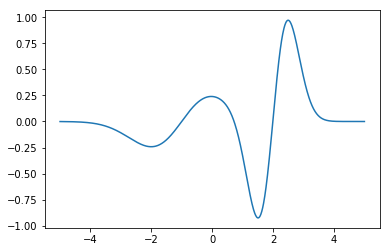

In [4]:
# Define a linear space for x from -5 to 5
N = 1000;
xr = np.linspace(-5,5,N);

# Gaussian Functions
def gaussian1(x,sigma,mu):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2/(2*sigma**2))

G1 = gaussian1(xr,1,-1);
G2 = gaussian1(xr,0.5,2);
GT = -(G1+G2);

# Evaluate the FDD(Finite-Difference Derivative) of GT
FDD1 = np.zeros(N);

for i in np.arange(N-1):
    FDD1[i] = (GT[i+1]-GT[i]) / (xr[i+1]-xr[i]);

GRAPH1 = mpl.plot(xr,FDD1)
mpl.show(GRAPH1)

# Part 2
2) Plot the FDD of $G_F$, where $G_F$ is $G_T$ unless $G_T\geqslant-0.2$, in which case $G_F=-0.2$ using both vectorization and for-loop to evaluate and compare the elapsed times.

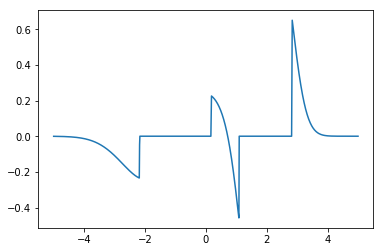

Time elapsed 0.08773994445800781 s


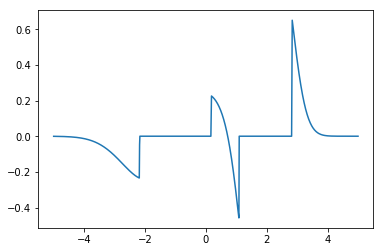

Time elapsed 0.12777185440063477 s


In [6]:
from time import time

t1 = time()

# Defining GF using True/False mask
GF = np.zeros(N);
GF_Mask1 = GT>=(-0.2);

GF = GT*GF_Mask1 + np.invert(GF_Mask1)*(-0.2);

# Evaluate the FDD(Finite-Difference Derivative) of GF
FDD2 = np.zeros(N);

for i in np.arange(N-1):
    FDD2[i] = (GF[i+1]-GF[i]) / (xr[i+1]-xr[i]);
        
GRAPH2 = mpl.plot(xr,FDD2)
mpl.show(GRAPH2)

elapsed1 = time()-t1
print('Time elapsed',elapsed1,'s')



t2 = time()

# Defining GF using elementweise comperation
GF2 = np.zeros(N);

for i in np.arange(N):
    if GT[i]>=-0.2:
        GF2[i] = GT[i];
    else:
        GF2[i] = -0.2;

# Evaluate the FDD(Finite-Difference Derivative) of GF
FDD3 = np.zeros(N);

for i in np.arange(N-1):
    FDD3[i] = (GF2[i+1]-GF2[i]) / (xr[i+1]-xr[i]);
        
GRAPH3 = mpl.plot(xr,FDD3)
mpl.show(GRAPH3)

elapsed2 = time()-t2
print('Time elapsed',elapsed2,'s')